In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import data

In [2]:
data = pd.read_csv('data.csv')
data = data.drop(columns=['id'])
data = data.drop(columns=['zipcode'])
data['date'] = data['date'].str.replace('T000000', '')
data.loc[data['yr_renovated'] == 0,'yr_renovated'] = data[data['yr_renovated'] == 0]['yr_built']
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,2009,47.6993,-122.346,1530,1509
21609,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,2014,47.5107,-122.362,1830,7200
21610,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,2009,47.5944,-122.299,1020,2007
21611,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,2004,47.5345,-122.069,1410,1287


## Data info

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average - level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Removing outliers

In [3]:
from sklearn.covariance import EllipticEnvelope
outlier_detector = EllipticEnvelope(contamination=.05)
outlier_detector.fit(data)
outliers = outlier_detector.predict(data)
print('Removing', (outliers == -1).sum(), 'outliers');

Removing 1081 outliers


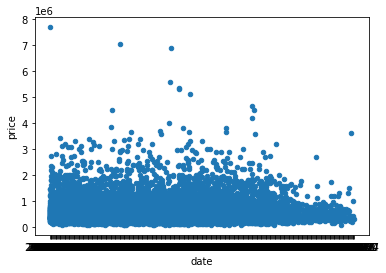

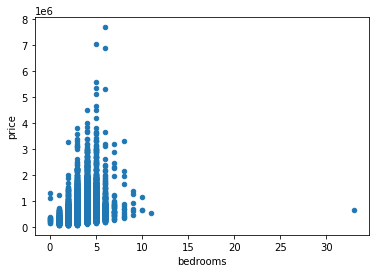

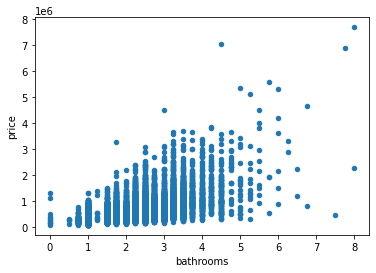

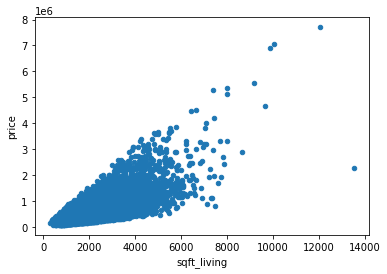

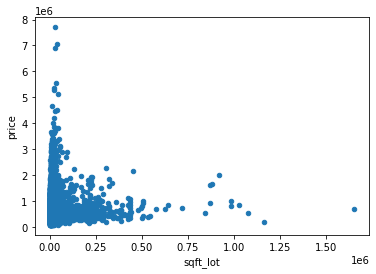

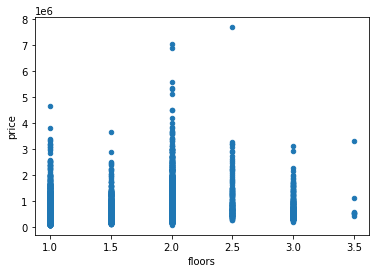

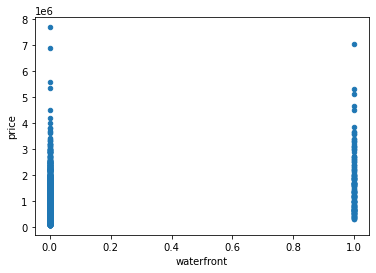

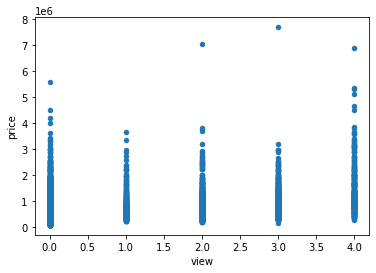

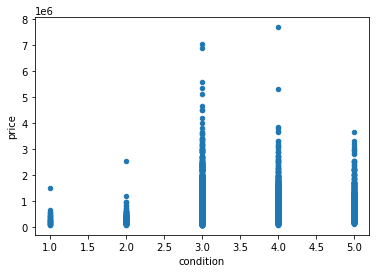

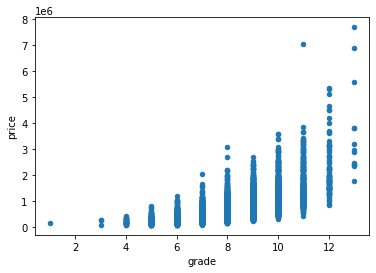

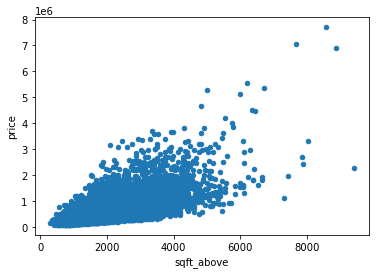

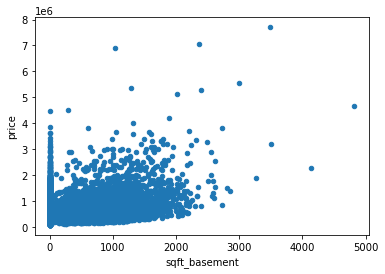

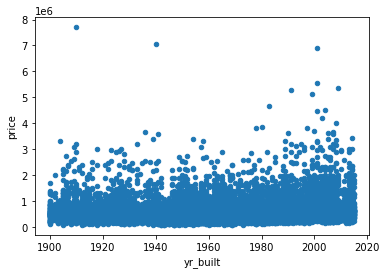

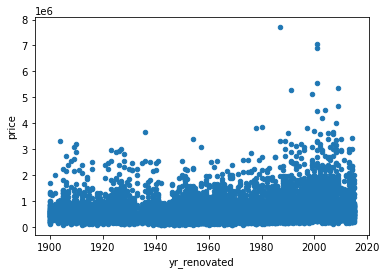

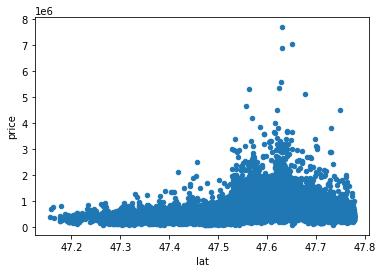

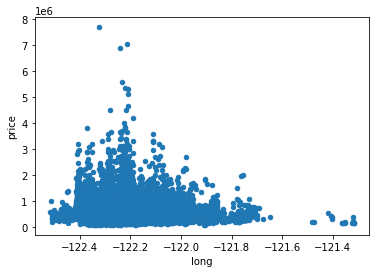

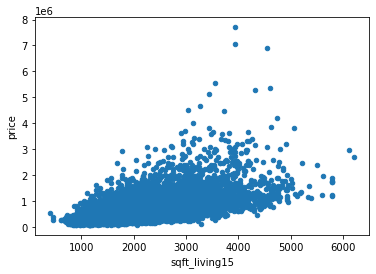

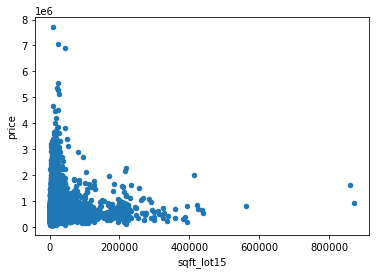

In [4]:
 for c in data.columns:
    if c != 'price':
        data.plot.scatter(x=c, y='price')

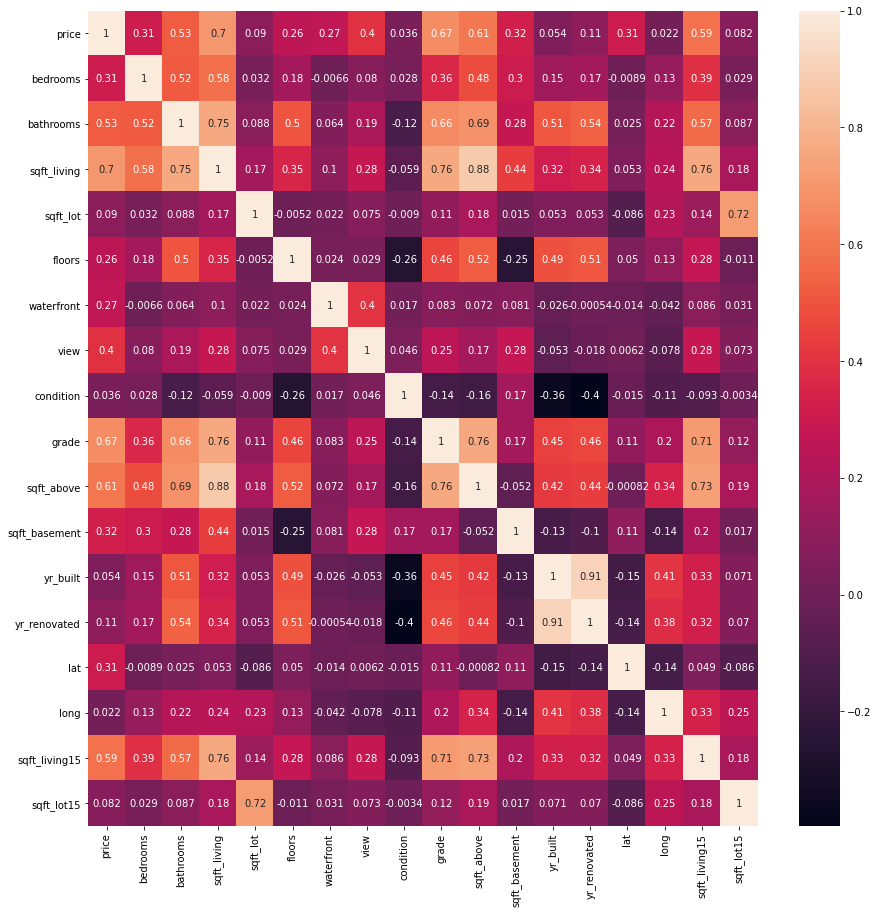

In [5]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(data.corr(),annot=True, ax=ax);

# Normalize data

In [6]:
from sklearn import preprocessing

In [7]:
scaler = preprocessing.StandardScaler()

In [8]:
data_std = scaler.fit_transform(data)

In [9]:
data_pd = pd.DataFrame(data_std)
data_pd.columns = data.columns
data_pd

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,-0.651343,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.638266,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.607163,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,0.611465,1.161568,-0.746341,-0.432686,-0.187868
2,1.425078,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-1.401991,1.283537,-0.135655,1.070140,-0.172375
3,-0.607163,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.291119,-0.283288,-1.271816,-0.914174,-0.284522
4,1.423501,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,0.472606,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.762241,-0.490545,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,1.236331,1.004958,-0.938069,-0.666135,-0.412381
21609,1.424628,-0.381588,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,1.409905,-0.356180,-1.051685,-0.228419,-0.203946
21610,-0.739250,-0.375865,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,1.236331,0.247888,-0.604321,-1.410253,-0.394141
21611,1.400509,-0.381588,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,1.062757,-0.184414,1.028910,-0.841221,-0.420511


# Split data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data_pd.drop(columns=['price'])
y = data['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [13]:
X_test

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
17384,-0.647736,-1.473959,-0.798235,-0.707628,-0.324894,2.788439,-0.087173,-0.305759,-0.629187,-0.558836,-0.432801,-0.658681,0.953090,0.889183,1.170229,-0.540412,-0.812040,-0.407217
722,-0.697550,0.676485,1.474063,2.820171,0.886756,0.936506,-0.087173,-0.305759,0.907554,3.694921,3.479903,-0.658681,0.578593,0.507321,0.540901,0.354315,3.273312,1.036735
2680,-0.738799,-1.473959,-1.772078,-0.696740,-0.275401,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.710555,-0.116388,-1.940750,-2.061572,0.798550,-1.065887,-0.797450,-0.310160
18754,-0.739025,-1.473959,-1.447464,-1.034276,-0.300992,-0.915427,-0.087173,-0.305759,0.907554,0.291916,-0.795089,-0.658681,-1.498163,-1.610280,0.604411,-1.016180,-0.447277,-0.350447
14554,1.470385,0.676485,0.500221,1.197819,-0.132883,0.936506,-0.087173,2.304185,-0.629187,1.142667,1.680542,-0.658681,1.055226,0.993328,1.527473,-0.448099,0.661605,0.091290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15932,-0.764946,0.676485,0.500221,0.816729,0.126463,0.936506,-0.087173,-0.305759,-0.629187,1.993418,0.231392,1.261942,0.272187,0.194888,0.621732,0.162588,1.230636,0.035290
8991,1.398255,-0.398737,-0.798235,-0.914505,-0.239186,-0.915427,-0.087173,-0.305759,2.444294,-1.409587,-0.662250,-0.658681,-0.034220,-0.117545,-1.383890,0.957900,-1.351890,-0.277197
14655,-0.764045,-0.398737,-1.447464,-0.402757,-0.266950,0.010539,-0.087173,-0.305759,-0.629187,-0.558836,-0.094667,-0.658681,-2.110976,-2.235145,0.816593,-0.831554,-0.286781,-0.288331
2169,-0.675912,0.676485,0.500221,1.328478,-0.104853,-0.915427,-0.087173,-0.305759,0.907554,1.142667,-0.082590,2.911418,-0.000175,-0.082830,1.095893,-1.072988,0.442746,-0.065686


In [14]:
y_test

17384     297000.0
722      1578000.0
2680      562100.0
18754     631500.0
14554     780000.0
           ...    
15932     782000.0
8991      214000.0
14655     620000.0
2169      765000.0
4067      373000.0
Name: price, Length: 2162, dtype: float64

# Neural network GRID search

In [15]:
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [16]:
def create_network(optimizer, neuron_number, layer_number, activation, loss):
    network = models.Sequential()
    network.add(layers.Dense(units=neuron_number, activation=activation, input_shape=(18,)))
    for i in range(layer_number):
        network.add(layers.Dense(units=neuron_number, activation=activation))
    network.add(layers.Dense(units=1))
    network.compile(loss=loss, optimizer=optimizer)

    return network

In [17]:
neural_network = KerasRegressor(build_fn=create_network, verbose=0)

In [18]:
epochs = [1]
batches = [64, 128, 256]
optimizers = ["rmsprop", "adam"]
neuron_numbers = [16, 32]
#layer_numbers = [0, 1, 2]
layer_numbers = [2, 3]
activations = ['relu', 'sigmoid']
losses = ['huber_loss', 'mean_squared_error', 'mean_absolute_error']

In [19]:
hyperparameters = dict(
    epochs=epochs, 
    batch_size=batches, 
    optimizer=optimizers, 
    neuron_number=neuron_numbers, 
    layer_number=layer_numbers,
    activation=activations,
    loss=losses
)
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters, verbose=10)

In [ ]:
grid_result = grid.fit(X_train, y_train)

In [21]:
params = grid_result.best_params_

params

{'activation': 'relu',
 'batch_size': 64,
 'epochs': 1,
 'layer_number': 3,
 'loss': 'mean_absolute_error',
 'neuron_number': 32,
 'optimizer': 'adam'}

# Final Neural Network

In [22]:
network = create_network(
    optimizer=params['optimizer'],
    neuron_number=params['neuron_number'],
    layer_number=params['layer_number'],
    activation=params['activation'],
    loss=params['loss']
)

In [23]:
# network = create_network(
#     optimizer='adam',
#     neuron_number=32,
#     layer_number=3,
#     activation='relu',
#     loss='huber_loss'
# )

In [24]:
history = network.fit(X_train,
                      y_train,
                      epochs=500,
                      verbose=1, 
                      batch_size=params['batch_size'],
                      validation_data=(X_test, y_test))

Epoch 1/500
304/304 [==============================] - 1s 2ms/step - loss: 508217.9688 - val_loss: 319373.8438
Epoch 2/500
304/304 [==============================] - 1s 2ms/step - loss: 217860.6250 - val_loss: 159680.7812
Epoch 3/500
304/304 [==============================] - 1s 2ms/step - loss: 150197.1719 - val_loss: 125679.4844
Epoch 4/500
304/304 [==============================] - 1s 2ms/step - loss: 126700.7422 - val_loss: 111258.1641
Epoch 5/500
304/304 [==============================] - 1s 2ms/step - loss: 117255.8594 - val_loss: 106537.9141
Epoch 6/500
304/304 [==============================] - 0s 1ms/step - loss: 113494.8750 - val_loss: 104792.7734
Epoch 7/500
304/304 [==============================] - 1s 2ms/step - loss: 111720.1328 - val_loss: 103644.7109
Epoch 8/500
304/304 [==============================] - 1s 2ms/step - loss: 110528.1016 - val_loss: 102992.6172
Epoch 9/500
304/304 [==============================] - 1s 2ms/step - loss: 109800.0938 - val_loss: 102545.4609
E

304/304 [==============================] - 0s 1ms/step - loss: 101214.9219 - val_loss: 96369.9219
Epoch 73/500
304/304 [==============================] - 0s 1ms/step - loss: 101122.4922 - val_loss: 96397.0000
Epoch 74/500
304/304 [==============================] - 0s 1ms/step - loss: 101110.7500 - val_loss: 96514.7969
Epoch 75/500
304/304 [==============================] - 0s 1ms/step - loss: 101074.5781 - val_loss: 96284.6172
Epoch 76/500
304/304 [==============================] - 0s 1ms/step - loss: 100996.0703 - val_loss: 96458.3828
Epoch 77/500
304/304 [==============================] - 0s 1ms/step - loss: 100931.4609 - val_loss: 96291.6953
Epoch 78/500
304/304 [==============================] - 0s 1ms/step - loss: 100975.0469 - val_loss: 96305.1406
Epoch 79/500
304/304 [==============================] - 0s 1ms/step - loss: 100875.2500 - val_loss: 96456.1641
Epoch 80/500
304/304 [==============================] - 0s 1ms/step - loss: 100845.1953 - val_loss: 96054.8281
Epoch 81/500
3

Epoch 146/500
304/304 [==============================] - 0s 1ms/step - loss: 93357.7188 - val_loss: 90103.5859
Epoch 147/500
304/304 [==============================] - 1s 2ms/step - loss: 92967.4922 - val_loss: 89954.1953
Epoch 148/500
304/304 [==============================] - 0s 1ms/step - loss: 92594.7422 - val_loss: 89635.1719
Epoch 149/500
304/304 [==============================] - 1s 2ms/step - loss: 92233.6250 - val_loss: 89363.4453
Epoch 150/500
304/304 [==============================] - 0s 1ms/step - loss: 91818.1719 - val_loss: 88999.1016
Epoch 151/500
304/304 [==============================] - 1s 2ms/step - loss: 91437.9609 - val_loss: 88721.3281
Epoch 152/500
304/304 [==============================] - 0s 1ms/step - loss: 91125.4141 - val_loss: 88303.7031
Epoch 153/500
304/304 [==============================] - 0s 1ms/step - loss: 90784.1719 - val_loss: 88083.0547
Epoch 154/500
304/304 [==============================] - 0s 1ms/step - loss: 90424.2109 - val_loss: 87839.8281
E

Epoch 220/500
304/304 [==============================] - 0s 1ms/step - loss: 76384.8281 - val_loss: 74498.0625
Epoch 221/500
304/304 [==============================] - 0s 1ms/step - loss: 76313.2969 - val_loss: 74928.3516
Epoch 222/500
304/304 [==============================] - 0s 993us/step - loss: 76106.6328 - val_loss: 74320.9609
Epoch 223/500
304/304 [==============================] - 0s 1ms/step - loss: 76000.8203 - val_loss: 74016.8203
Epoch 224/500
304/304 [==============================] - 0s 1ms/step - loss: 75797.0859 - val_loss: 73996.5781
Epoch 225/500
304/304 [==============================] - 0s 990us/step - loss: 75601.2344 - val_loss: 73682.4219
Epoch 226/500
304/304 [==============================] - 0s 1ms/step - loss: 75473.7188 - val_loss: 73656.4844
Epoch 227/500
304/304 [==============================] - 0s 1ms/step - loss: 75320.6328 - val_loss: 73794.4453
Epoch 228/500
304/304 [==============================] - 0s 1ms/step - loss: 75190.3594 - val_loss: 73560.04

Epoch 294/500
304/304 [==============================] - 0s 1ms/step - loss: 69035.5938 - val_loss: 67979.1641
Epoch 295/500
304/304 [==============================] - 0s 1ms/step - loss: 68991.5547 - val_loss: 67787.3828
Epoch 296/500
304/304 [==============================] - 0s 1ms/step - loss: 69015.6562 - val_loss: 68239.1562
Epoch 297/500
304/304 [==============================] - 0s 1ms/step - loss: 68881.3359 - val_loss: 67730.8906
Epoch 298/500
304/304 [==============================] - 0s 1ms/step - loss: 68755.0781 - val_loss: 68133.7031
Epoch 299/500
304/304 [==============================] - 0s 1ms/step - loss: 68967.4844 - val_loss: 67610.4531
Epoch 300/500
304/304 [==============================] - 0s 1ms/step - loss: 68717.2656 - val_loss: 67702.5938
Epoch 301/500
304/304 [==============================] - 0s 1ms/step - loss: 68632.2266 - val_loss: 67523.8984
Epoch 302/500
304/304 [==============================] - 0s 1ms/step - loss: 68534.3750 - val_loss: 67646.1016
E

Epoch 368/500
304/304 [==============================] - 0s 1ms/step - loss: 65675.9766 - val_loss: 65231.6445
Epoch 369/500
304/304 [==============================] - 0s 1ms/step - loss: 65658.8438 - val_loss: 65672.8594
Epoch 370/500
304/304 [==============================] - 0s 1ms/step - loss: 65617.3750 - val_loss: 65059.1602
Epoch 371/500
304/304 [==============================] - 0s 1ms/step - loss: 65522.1211 - val_loss: 65208.3633
Epoch 372/500
304/304 [==============================] - 0s 1ms/step - loss: 65387.2969 - val_loss: 65059.1523
Epoch 373/500
304/304 [==============================] - 0s 1ms/step - loss: 65683.8125 - val_loss: 65647.9141
Epoch 374/500
304/304 [==============================] - 0s 1ms/step - loss: 65535.1719 - val_loss: 64946.2852
Epoch 375/500
304/304 [==============================] - 0s 2ms/step - loss: 65596.1641 - val_loss: 65353.6211
Epoch 376/500
304/304 [==============================] - 1s 2ms/step - loss: 65498.8008 - val_loss: 64980.3359
E

304/304 [==============================] - 0s 1ms/step - loss: 64116.2812 - val_loss: 64227.3164
Epoch 442/500
304/304 [==============================] - 0s 1ms/step - loss: 64075.2383 - val_loss: 64513.8594
Epoch 443/500
304/304 [==============================] - 0s 1ms/step - loss: 64056.9414 - val_loss: 64229.8828
Epoch 444/500
304/304 [==============================] - 1s 2ms/step - loss: 64018.3125 - val_loss: 64112.9844
Epoch 445/500
304/304 [==============================] - 0s 1ms/step - loss: 64009.1094 - val_loss: 64634.6953
Epoch 446/500
304/304 [==============================] - 0s 1ms/step - loss: 64058.1875 - val_loss: 63913.8867
Epoch 447/500
304/304 [==============================] - 0s 1ms/step - loss: 64057.1133 - val_loss: 64243.3672
Epoch 448/500
304/304 [==============================] - 0s 1ms/step - loss: 63961.4258 - val_loss: 64590.7109
Epoch 449/500
304/304 [==============================] - 0s 1ms/step - loss: 63951.6641 - val_loss: 64354.6875
Epoch 450/500
3

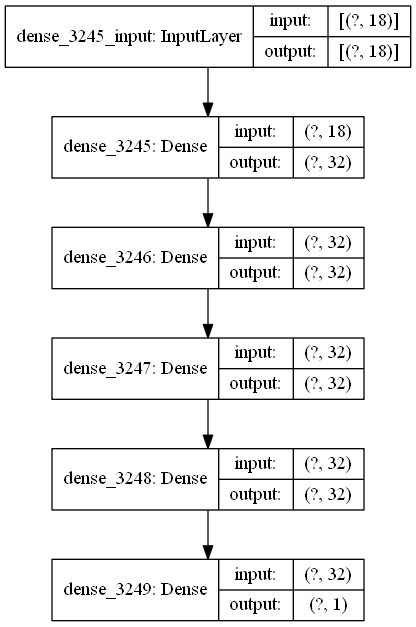

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(network, to_file='model.png', show_shapes=True, show_layer_names=True)

In [26]:
scores = network.evaluate(X_test, y_test, verbose=0)
scores

63564.6328125

## Loss history

In [27]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
count = range(1, len(train_loss) + 1)
#count = range(1, len(train_loss)-101 + 1)

In [28]:
len(train_loss[100:-1])

399

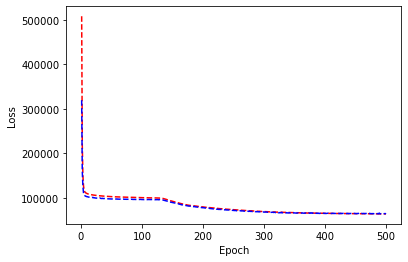

63564.6484375


In [29]:
plt.plot(count, train_loss, 'r--');
plt.plot(count, test_loss, 'b--');
#plt.legend('Training loss', 'Test loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.show();
print(test_loss[-1]);

## Predictions

In [30]:
preds = network.predict(X_test)
preds

array([[ 311850.53],
       [1714491.9 ],
       [ 551336.94],
       ...,
       [ 599159.44],
       [ 834684.7 ],
       [ 348879.47]], dtype=float32)

In [31]:
y_test

17384     297000.0
722      1578000.0
2680      562100.0
18754     631500.0
14554     780000.0
           ...    
15932     782000.0
8991      214000.0
14655     620000.0
2169      765000.0
4067      373000.0
Name: price, Length: 2162, dtype: float64

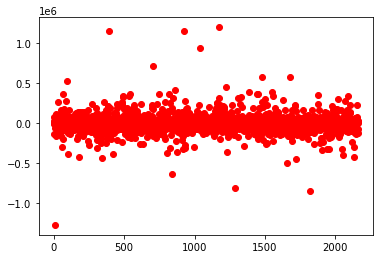

In [32]:
plt.plot((y_test.to_numpy().reshape(-1, 1) - preds)[:], 'ro');

In [33]:
from keras import models  
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  
from keras_visualizer import visualizer 

network.summary() 
  
visualizer(network, format='png', view=True)

Model: "sequential_721"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3245 (Dense)           (None, 32)                608       
_________________________________________________________________
dense_3246 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_3247 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_3248 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_3249 (Dense)           (None, 1)                 33        
Total params: 3,809
Trainable params: 3,809
Non-trainable params: 0
_________________________________________________________________


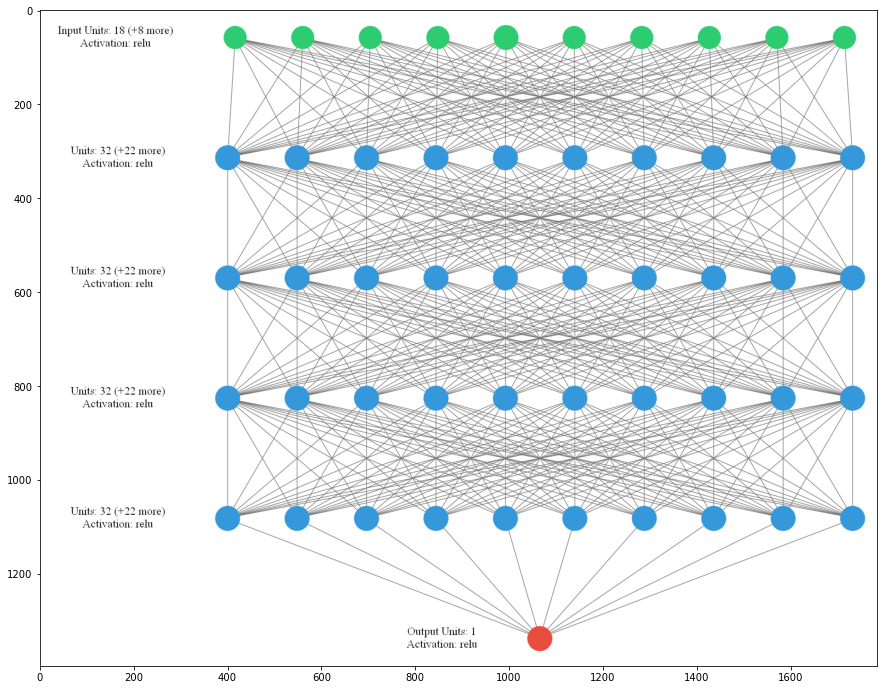

In [34]:
import matplotlib.image as mpimg
plt.figure(figsize = (15,15))
img = mpimg.imread('graph.png')
plt.imshow(img)
plt.show()